In [11]:
import random
import datetime

In [12]:
SYNSEP_CATEGORY_MAPPING = ['1', '2', '3', '4', '5', '6', '7', '8', '9']

In [13]:
class Banditron:

    def __init__(self):
        self.gamma = 0.03
        self.dict_length = 400
        self.weights = self.init_weights()
        self.error_rate = 0.0
        self.correct_classified = 0.0
        self.incorrect_classified = 0.0
        self.number_of_rounds = 0.0

    def init_weights(self):
        weights = []
        for i in range(0,len(SYNSEP_CATEGORY_MAPPING)):
            weights.append([0.0] * self.dict_length)
        return weights

    def update_weights(self, update_matrix):
        for i in range(0,len(self.weights)):
            for j in range(0,len(self.weights[i])):
                self.weights[i][j] += update_matrix[i][j]

    def get_update_matrix(self, feature_vectors, calculated_label, predicted_label, true_label, probabilities):
        update_matrix = self.init_weights()
        for i in range(0,len(update_matrix)):
            left = 0.0
            right = 0.0
            if true_label == predicted_label and predicted_label == i:
                left = 1/probabilities[i]
            if calculated_label == i:
                right = 1.0
            for j in range(0,len(feature_vectors)):
                update_matrix[i][j] = feature_vectors[j] * (left - right)
        return update_matrix

    def run(self, feature_vectors, true_label):
        self.number_of_rounds += 1.0
        calculated_label = self.predict_label(feature_vectors)
        probabilities = self.calc_probabilities(calculated_label)
        predicted_label = self.random_sample(probabilities)
        if true_label == predicted_label:
            self.correct_classified += 1.0
        else:
            self.incorrect_classified += 1.0
        self.error_rate = self.incorrect_classified/self.number_of_rounds
       
        update_matrix = self.get_update_matrix(feature_vectors, calculated_label, predicted_label, true_label, probabilities)
        self.update_weights(update_matrix)

    def predict_label(self, feature_vectors):
        max = 0.0
        label = 0
        for i in range(0,len(self.weights)):
            total = 0.0
            for eachVector in range(0,len(feature_vectors)):
                total += feature_vectors[eachVector]*self.weights[i][eachVector]
            if total >= max:
                max = total
                label = i
        return label

    def calc_probabilities(self, calculated_label):
        probabilities = [0] * len(self.weights)
        for i in range(0,len(probabilities)):
            probabilities[i] = self.gamma/len(self.weights)
            if i == calculated_label:
                probabilities[i] += (1 - self.gamma)
        return probabilities

    def random_sample(self, probabilities):
        number = random.random() * sum(probabilities)
        for i in range(0,len(probabilities)):
            if number < probabilities[i]:
                return i
                break
            number -= probabilities[i]
        return len(probabilities)-1


In [14]:
import csv
import matplotlib.pyplot as plt

def main():
    banditron = Banditron()
    error_list = list()
    rounds = list()
    with open('SYNSEP.csv', newline='') as f:
        reader = csv.reader(f)
        t=0.0
        for line in reader:    
            line2 = [float(i) for i in line]
            
            feature_vector, true_label = line2[:400], int(line2[400])
            banditron.run(feature_vector, true_label-1)
            if ((t+1)%10000) == 0:
                rounds.append(banditron.number_of_rounds)
                error_list.append(banditron.error_rate)
            t+=1.0
    print ("banditron.correct_classified = ", banditron.correct_classified)
    print ("banditron.incorrect_classified = ", banditron.incorrect_classified)
    print ("banditron.error_rate = ", banditron.error_rate)    
    plt.plot(rounds, error_list)
    plt.show()

    

banditron.correct_classified =  111270.0
banditron.incorrect_classified =  888730.0
banditron.error_rate =  0.88873


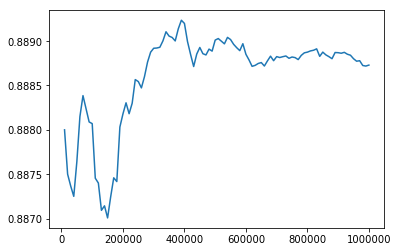

In [15]:
if __name__=="__main__":
    main()